In [1]:
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Проверка равенства средних значений (гипотеза об однородности)

## Критерий Стьюдента

In [4]:
X = np.array([4297.3, 4244.3, 4386.3, 4085.4, 4321.5, 4290.5, 4771.7, 4809.9])
Y = np.array([4281.2, 4426.5, 4571.7, 4896.0, 4339.5, 4278.0])

In [5]:
X.mean(), Y.mean()

(4400.8625, 4465.483333333334)

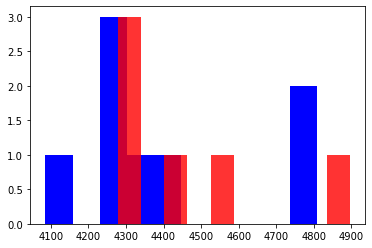

In [6]:
plt.hist(X, color='b')
plt.hist(Y, color='r', alpha=0.8)
plt.show()

### Пусть дисперсии равны

In [8]:
alpha = 0.05
s, p = stats.ttest_ind(X, Y, alternative='two-sided')
if p < alpha:
    print('Rejecting H0, HA')
else:
    print('Do not reject H0, H0')

Do not reject H0, H0


In [9]:
stats.ttest_ind(X, Y, alternative='two-sided')

Ttest_indResult(statistic=-0.48138457184648514, pvalue=0.6389021669918256)

In [29]:
s, p = stats.ttest_ind(X, Y, alternative='two-sided')
p

0.6389021669918256

In [30]:
p / 2

0.3194510834959128

#### Односторонний вариант

In [10]:
# X < Y
stats.ttest_ind(X, Y, alternative='less')

Ttest_indResult(statistic=-0.48138457184648514, pvalue=0.3194510834959128)

In [11]:
# Y > X
stats.ttest_ind(Y, X, alternative='greater')

Ttest_indResult(statistic=0.48138457184648514, pvalue=0.3194510834959128)

### Пусть о дисперсиях ничего не известно

In [12]:
X.var(ddof=1), Y.var(ddof=1)

(65468.01124999992, 56625.68566666667)

In [13]:
X.std(ddof=1), Y.std(ddof=1)

(255.86717501469374, 237.96152139929404)

## Критерий Фишера

In [14]:
# H0: delta = var(X) / var(Y) = 1
# HA: delta != 1

In [15]:
F = X.var(ddof=1) / Y.var(ddof=1)
F

1.1561539693379534

In [16]:
n1 = len(X) - 1
n2 = len(Y) - 1
n1, n2

(7, 5)

In [19]:
# Функция распределения - вероятность получить значение, меньшее чем аргумент
# ЭТО ОДНОСТОРОННЕЕ P-VALUE
# ДЛЯ ПРОВЕРКИ ДЛЯ ПРИМЕНЕНИЯ СТЬЮДЕНТА ЕГО НЕОБХОДИМО УМНОЖАТЬ НА 2
p_value = 1 - stats.f.cdf(F, n1, n2)
p_value

0.45208520633673777

In [20]:
if p_value > alpha:
    print('Do not reject H0, H0')
else:
    print('Reject H0, Ha')

Do not reject H0, H0


In [22]:
F_new = 1 / F
F_new

0.8649367009245562

In [23]:
stats.f.cdf(F_new, n2, n1)

0.4520852063367376

In [25]:
1 - stats.f.cdf(F, n1, n2), stats.f.cdf(1 / F, n2, n1)

(0.45208520633673777, 0.4520852063367376)

In [26]:
import scipy

In [28]:
scipy.__version__

'1.6.0'

## MWW

In [31]:
X, Y

(array([4297.3, 4244.3, 4386.3, 4085.4, 4321.5, 4290.5, 4771.7, 4809.9]),
 array([4281.2, 4426.5, 4571.7, 4896. , 4339.5, 4278. ]))

In [34]:
stats.mannwhitneyu(X, Y, alternative='two-sided')

MannwhitneyuResult(statistic=19.0, pvalue=0.5612758361345778)

In [35]:
stats.mannwhitneyu(X, Y, alternative='less')

MannwhitneyuResult(statistic=19.0, pvalue=0.2806379180672889)

## MWW by hand

In [5]:
a = np.random.normal(1000, 100, 20).astype(int)
a

array([ 990,  880, 1051, 1122,  947, 1138, 1168, 1110, 1203,  860,  913,
        948,  861,  894, 1057, 1152,  965, 1080, 1122, 1060])

In [16]:
b = np.random.normal(1120, 120, 22).astype(int)
b

array([1227,  971, 1102, 1009, 1097, 1234, 1124, 1388, 1222, 1267,  885,
        957, 1185,  997, 1195, 1145, 1135, 1214,  977, 1028, 1121, 1138])

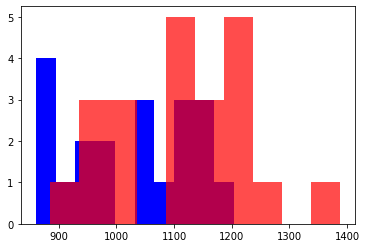

In [17]:
plt.hist(a, color='b')
plt.hist(b, color='r', alpha=0.7)
plt.show()

In [34]:
stats.mannwhitneyu(a, b, alternative='two-sided')

MannwhitneyuResult(statistic=123.5, pvalue=0.015610808309445022)

In [19]:
n1 = len(a)
n2 = len(b)
N = n1 + n2

In [22]:
R = stats.rankdata(np.hstack([a, b]))
R1 = R[:n1]
R2 = R[n1:N]
R1, R2

(array([13. ,  3. , 17. , 25.5,  7. , 29.5, 33. , 23. , 36. ,  1. ,  6. ,
         8. ,  2. ,  5. , 18. , 32. , 10. , 20. , 25.5, 19. ]),
 array([39. , 11. , 22. , 15. , 21. , 40. , 27. , 42. , 38. , 41. ,  4. ,
         9. , 34. , 14. , 35. , 31. , 28. , 37. , 12. , 16. , 24. , 29.5]))

In [24]:
U1 = n1 * n2 + n1 * (n1 + 1) / 2 - R1.sum()
U2 = n1 * n2 + n2 * (n2 + 1) / 2 - R2.sum()
U1 + U2, n1 * n2

(440.0, 440)

In [25]:
U = min(U1, U2)
U1, U2, U

(316.5, 123.5, 123.5)

In [26]:
MU = n1 * n2 / 2
DU = n1 * n2 * (n1 + n2 + 1) / 12
std_U = (U - MU) / np.sqrt(DU)
std_U

-2.430285917457443

In [36]:
stats.norm.cdf(std_U) * 2

0.015086915975971985

In [46]:
stats.shapiro(b)

ShapiroResult(statistic=0.9746823310852051, pvalue=0.8160852789878845)

## Критерий Ансари-Бредли

In [36]:
stats.ansari(X, Y)

AnsariResult(statistic=32.0, pvalue=1.0)

In [40]:
np.median(X), np.median(Y)

(4309.4, 4383.0)

In [42]:
X_tr = X - np.median(X)
Y_tr = Y - np.median(Y)
X_tr, Y_tr

(array([ -12.1,  -65.1,   76.9, -224. ,   12.1,  -18.9,  462.3,  500.5]),
 array([-101.8,   43.5,  188.7,  513. ,  -43.5, -105. ]))

In [43]:
stats.ansari(X_tr, Y_tr)

AnsariResult(statistic=35.0, pvalue=0.5268065268065268)

# Задача ОДН-2

In [44]:
X = [258, 588, 477, 577, 619, 614, 641, 543, 517, 593]
X = np.array(X)
m = len(X)
X.mean(), m

(542.7, 10)

In [45]:
Y = [537, 398, 256, 440, 376, 524, 527, 589, 479]
Y = np.array(Y)
n = len(Y)
Y.mean(), n

(458.44444444444446, 9)

In [46]:
alpha = 0.05

In [47]:
# Можно ли считать, опираясь на эти данные, что экономический кризис привел 
# к снижению показателя X?
# СМЕЩЕНИЕ
# H0 : theta = my - mx = 0
# HA : theta = my - mx < 0, my < mx

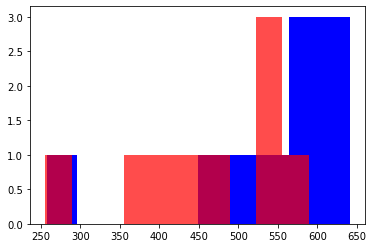

In [48]:
plt.hist(X, color='b')
plt.hist(Y, color='r', alpha=0.7)
plt.show()

In [49]:
stats.shapiro(X)

ShapiroResult(statistic=0.7683424949645996, pvalue=0.0059696887619793415)

In [50]:
stats.shapiro(Y)

ShapiroResult(statistic=0.9406910538673401, pvalue=0.5891920328140259)

In [51]:
# Не можем применять критерий Стьюдента, т.к. Х не имеет нормального распределения
# Применяем MWW

In [52]:
# stats.mannwhitneyu(X, Y, alternative='less') -> X < Y
# stats.mannwhitneyu(X, Y, alternative='greater') -> X > Y

stats.mannwhitneyu(X, Y, alternative='greater')

MannwhitneyuResult(statistic=70.0, pvalue=0.02272764742452923)

0.02272764742452923 < 0.05 (уровень значимости) => отвергаем H0 в пользу альтернативы HA (my < mx), то есть, можно говорить о том, что экономический привел к снижению показателя X

# Задача ОДН-32

In [53]:
A = [ 0.4, 3.3, 2.7, 2.1, 3.6, 4.8, 7.6, 3.7, 1.4, 3.6]
B = [0.3, 5.5, 9.5, 0.2, 5, 4.3, 2.7, 6.3, 2.7, 4.8, 8.3, 11.2]
A = np.array(A)
B = np.array(B)
A.var(ddof=1), B.var(ddof=1)

(3.8773333333333335, 11.609696969696968)

In [54]:
# Можно ли говорить о том, что предсказать время доставки в городе А легче, чем в городе Б, 
# учитывая, что данные имеют нормальное распределение?

H0: delta = sigma_B / sigma_A = 1

HA: delta = sigma_B / sigma_A > 1, sigma_B > sigma_A

In [55]:
F = B.var(ddof=1) / A.var(ddof=1)
F

2.9942478429411024

In [57]:
n1 = len(B) - 1
n2 = len(A) - 1
n1, n2

(11, 9)

In [58]:
p_value = 1 - stats.f.cdf(F, n1, n2)
p_value

0.055282414081681

In [59]:
if p_value < alpha:
    print('H1')
else:
    print('H0')

H0


как пример:

In [60]:
1 - stats.f.cdf(F, n1 + 50, n2 + 50)

1.9179375191025194e-05